## Covid-19 Tweet's Sentiment Analysis

### About the Dataset:
* Dataset used in this project consists of a **collection of tweets** that were **posted during covid-19 pandemic** by users from different locations across the globe.
* Datset **consists of tweets and sentiments** reflected from them, alongwith other information like location, date, username etc.


* **EDA and Data Visualisation**
* **Preprocessing**
    * hashtags, mentions, URLs, punctuation, special characters removal
    * lowercasing
    * WordCloud visualizaion
    * Label Preprocessing
    * Text normalization (Stemming)
    * Stopword Removal
    * Vectorization (using TF-IDF)
    * Train-Test split
* **Machine Learning and Hyperparameter Tuning**
    * Models used:
        * *Logistic Regression*
        * *SVM*
        * *Naive Bayes*
        * *Decision Tree*
        * *KNN*
    * For HyperParameter Tuning: **GridSearchCV**
* **Summary**

# Training

In [8]:
import pandas as pd

corona=pd.read_csv('Corona_NLP_train.csv',encoding='latin1')
corona.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Data Preparation

In [9]:
corona.shape

(41157, 6)

### Feature Reduction:

In [10]:
# function to keep only Text and label:
def feature(corona):
    x=corona['OriginalTweet']
    y=corona['Sentiment']
    corona=pd.concat((x,y),axis=1)
    return corona

In [11]:
data_check=pd.concat([corona.isnull().sum(),corona.nunique()],axis=1,keys=['Null Counts','Cardinality'])
data_check

,Null Counts,Cardinality
UserName,0,41157
ScreenName,0,41157
Location,8590,12220
TweetAt,0,30
OriginalTweet,0,41157
Sentiment,0,5


In [12]:
corona_new=feature(corona)

### Let us check for any null values and Cardinality that we may have in our Data

In [13]:
data_check=pd.concat([corona_new.isnull().sum(),corona_new.nunique()],axis=1,keys=['Null Counts','Cardinality'])
data_check

,Null Counts,Cardinality
OriginalTweet,0,41157
Sentiment,0,5


## Inights: 
- Location have null values 
- We have almost different types of tweets 


In [14]:
corona_new = corona_new.dropna

### Tweet Counts

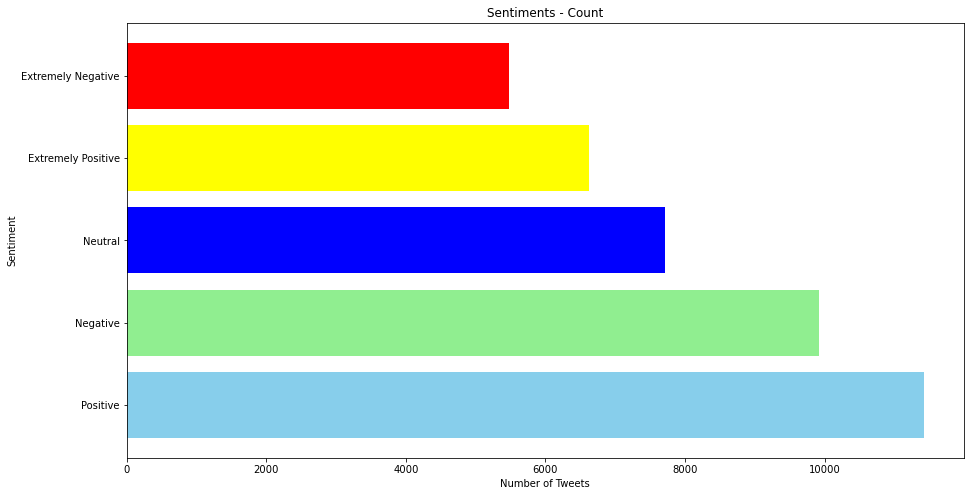

In [15]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

sentiments=corona.Sentiment.value_counts()

plt.subplots(figsize=(15,8))
plt.barh(sentiments.index,sentiments.values, color=['skyblue','lightgreen','blue','yellow','red'])
plt.title("Sentiments - Count")
plt.ylabel('Sentiment')
plt.xlabel('Number of Tweets')
plt.yticks(sentiments.index)
plt.show()

## Insights
* High numbers for Postive tweets - (form patience getting treated well or recovered )
* Second High number for negative tweets (not happy with circumstances)

## Text Preprocessing
* **Hashtag**, **Mention** and **URL** Removal 
* Punctuation removal:
    * **Apostrophe**
    * **Special Characters**
    * **Numbers**
* **Formatting Symbols** and **Escape character** removal
* **Lowercasing**
* **Redundant Spaces** removal

In [16]:
# function for initial textual preprocessing:
def preprocessing(x):
    import re
    # helper functions:
    def remove_hashtags(text): return re.sub(r'#\w*', ' ' , text)
    def remove_mentions(text): return re.sub(r'@\w*', ' ' , text)
    def remove_urls(text): return re.sub(r'https?://\S+', ' ', text)
    def remove_apostrophe(text): return re.sub(r"'s\b", "", text)
    def remove_special_chars(text): return re.sub(r"[^a-zA-Z0-9\s]", ' ', text)
    def remove_numbers(text): return re.sub(r'[\d]', ' ', text)
    def remove_formatting_symbols(text): return re.sub(r"[\r\n]+",'',text)
    def remove_escape_characters(text): return re.sub(r"\\",'',text)
    def remove_extra_spaces(text): return re.sub(r"\s{2,}",' ',text)
    x=x.apply(remove_hashtags)
    x=x.apply(remove_mentions)
    x=x.apply(remove_urls)
    x=x.apply(remove_apostrophe)
    x=x.apply(remove_special_chars)
    x=x.apply(remove_numbers)
    x=x.apply(remove_formatting_symbols)
    x=x.apply(remove_escape_characters)
    x=x.apply(remove_extra_spaces)
    x=x.str.lower()
    return x

## Word Cloud


## Word Clouds creates a proportion chart to show the words according to Frequency

WordCloud( font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30, )

In [12]:
from wordcloud import WordCloud, STOPWORDS

# function to build sentiment wisewordcloud:
def show_wordcloud(corona):
    sentiments=corona.Sentiment.value_counts().index.to_list()
    
    stopwords = set(STOPWORDS)
    
    plt.subplots(figsize=(14,14))
    i=1
    for senti in sentiments:
        curr=corona['OriginalTweet'].loc[corona.Sentiment==senti]
        text=curr.values
        text=' '.join(text)
        
        wordcloud=WordCloud(max_words=200, stopwords=stopwords, background_color='white', max_font_size=50).generate(text)
        
        plt.subplot(3,2,i)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(senti,fontsize=15)
        i+=1
        

CPU times: user 6.41 s, sys: 285 ms, total: 6.7 s
Wall time: 6.71 s


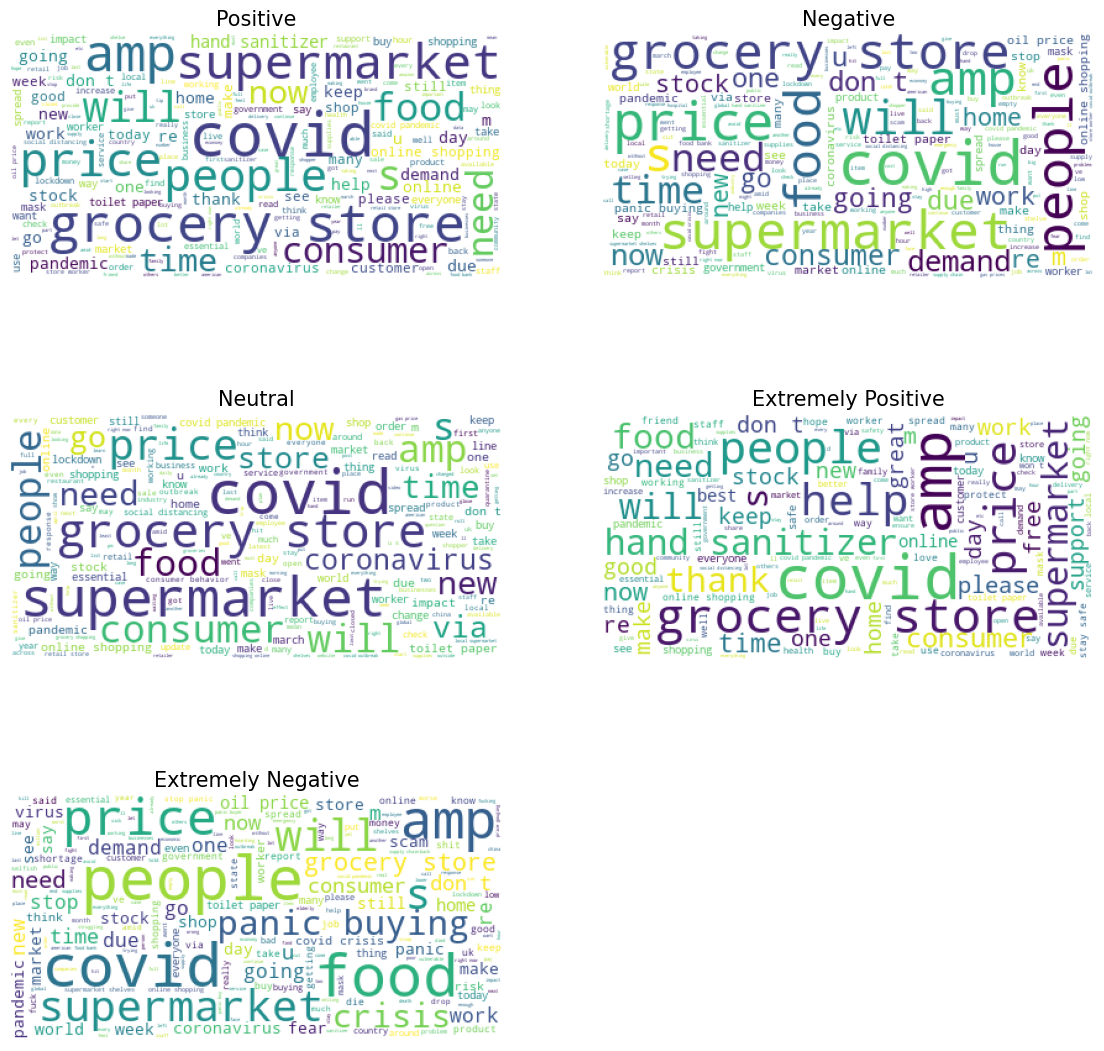

In [13]:
%%time
# generating wordclouds:
show_wordcloud(cloud)

## Label Preprocessing
* **Label Reduction** (by grouping)
    * (Extremely Negative, Negative) --> negative
    * (Extremely Positive, Positive) --> positive
    * (Neutral) --> neutral
* **Label Encoding**
    * negative --> -1
    * positive --> 1
    * neutral --> 0

In [17]:
# function for label reduction and encoding:
def label_preprocessing(corona):
    lab_dict={
        'Extremely Negative': 'negative',
        'Negative': 'negative',
        'Neutral': 'neutral',
        'Positive': 'positive',
        'Extremely Positive': 'positive'
    }
    corona['Sentiment']=corona['Sentiment'].map(lab_dict)
    
    encoder={'negative': -1, 'neutral': 0, 'positive': 1}
    corona['Sentiment']=corona['Sentiment'].map(encoder)
    
    return corona

In [18]:
%%time
# label preprocessing:
corona=label_preprocessing(corona)
corona

CPU times: total: 15.6 ms
Wall time: 17.3 ms


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",-1
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,0
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,-1
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,1
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,0


### Sentiment wise Tweets

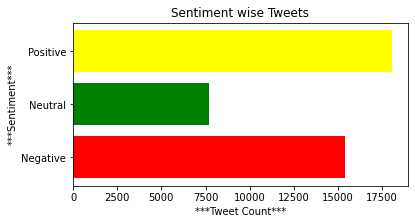

In [20]:
senti=corona['Sentiment'].value_counts()
plt.subplots(figsize=(6,3))
plt.barh(senti.index, senti.values, color=['yellow','red','green'])
plt.yticks(senti.index, ['Positive', 'Negative', 'Neutral'])
plt.title('Sentiment wise Tweets')
plt.ylabel('***Sentiment***')
plt.xlabel('***Tweet Count***')
plt.show()

## Insights

- More Positive tweets 
- Very less percentage of people were neural about the situation

## Text Normalization
#### (Stemming)

In [21]:
# function for stemming:
def stemming(x):
    import nltk
    nltk.download('punkt')
    from nltk.stem import PorterStemmer
    from nltk.tokenize import word_tokenize

    def stem_func(text):
        stemmer=PorterStemmer()
        tok=word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in tok])
    
    x=x.apply(stem_func)
    return x

In [25]:
%%time
stem_corona=corona.copy()
stem_corona['OriginalTweet']=stemming(stem_corona['OriginalTweet'])
stem_corona

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suyashi144893\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


CPU times: total: 23.2 s
Wall time: 23.4 s


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@ menyrbi @ phil_gahan @ chrisitv http : //t.c...,0
1,3800,48752,UK,16-03-2020,advic talk to your neighbour famili to exchang...,1
2,3801,48753,Vagabonds,16-03-2020,coronaviru australia : woolworth to give elder...,1
3,3802,48754,NaN,16-03-2020,my food stock is not the onli one which is emp...,1
4,3803,48755,NaN,16-03-2020,"me , readi to go at supermarket dure the # cov...",-1
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airlin pilot offer to stock supermarket shelv ...,0
41153,44952,89904,NaN,14-04-2020,respons to complaint not provid cite covid-19 ...,-1
41154,44953,89905,NaN,14-04-2020,you know itâ get tough when @ kameronwild is ...,1
41155,44954,89906,NaN,14-04-2020,is it wrong that the smell of hand sanit is st...,0


## Removing Stopwords

In [26]:
# function for removing stopwords:
def remove_stopwords(x):
    import nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    from nltk.tokenize import word_tokenize
    
    def func(text):
        stop_words = set(stopwords.words('english'))
        tok=word_tokenize(text)
        return ' '.join([word for word in tok if word not in stop_words])
    
    x=x.apply(func)
    return x

In [29]:
%%time
# stopword removal on lemmatized data:
stem_clean_corona=stem_corona.copy()
stem_clean_corona['OriginalTweet']=remove_stopwords(stem_clean_corona['OriginalTweet'])
stem_clean_corona

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suyashi144893\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: total: 18.6 s
Wall time: 18.7 s


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@ menyrbi @ phil_gahan @ chrisitv http : //t.c...,0
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,1
2,3801,48753,Vagabonds,16-03-2020,coronaviru australia : woolworth give elderli ...,1
3,3802,48754,NaN,16-03-2020,"food stock onli one empti ... pleas , n't pani...",1
4,3803,48755,NaN,16-03-2020,", readi go supermarket dure # covid19 outbreak...",-1
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airlin pilot offer stock supermarket shelv # n...,0
41153,44952,89904,NaN,14-04-2020,respons complaint provid cite covid-19 relat d...,-1
41154,44953,89905,NaN,14-04-2020,know itâ get tough @ kameronwild ration toile...,1
41155,44954,89906,NaN,14-04-2020,wrong smell hand sanit start turn ? # coronavi...,0


## Let us create a model for Prediction
### Train-Test split
- Model Training (X_train and Y_train)
- Predict: Ypred = (X_test)
- Testing : Yprec and Ytest

In [30]:
# function to apply train-test split:
def tts(x,y):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
    return x_train,x_test,y_train,y_test

In [31]:
# applying train-test split on lemma_clean_df:
x_train, x_test, y_train, y_test = tts(corona.OriginalTweet, corona.Sentiment)

## Vectorization
Term frequency inverse document frequency)
- Measure to undertand importance of any term/word in a document relative to other. 
### TF-IDF Vectorization method

In [32]:
# function for vectorization:
def vectorize(x_train, x_text):
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf_vector = TfidfVectorizer(stop_words='english')
    tfidf_x_train = tfidf_vector.fit_transform(x_train.values)
    tfidf_x_test = tfidf_vector.transform(x_test.values)
    return tfidf_x_train, tfidf_x_test, tfidf_vector

# function for vectorizing random data:
def vec(x,vect):
    x_vec = vect.transform(x.values)
    return x_vec

In [33]:
%%time
# vectorizing lemmatized data:
x_train_vec, x_test_vec, vector = vectorize(x_train, x_test)

CPU times: total: 875 ms
Wall time: 918 ms


## Hyperparameter Tuning and Model Selection
#### (Using GridSearchCV)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import time

In [35]:
# function for fitting tuning and result generation:

def result_grid(x_train, y_train, x_test, y_test):
    model_param_grid={
        'Logistic Regression':(LogisticRegression(),{'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                                                    'solver': ['liblinear', 'newton-cg', 'sag']}),
        'KNN':(KNeighborsClassifier(),{'n_neighbors': [3, 5, 7]}),
        'Naive Bayes':(MultinomialNB(),{'alpha': [0.1, 1.0, 10.0], 'fit_prior': [True,False]}),
        'SVM':(LinearSVC(),{'C': [0.1, 1.0, 10.0], 'penalty':['l1','l2']}),
        'Decision Tree':(DecisionTreeClassifier(),{'criterion': ['gini','entropy'], 'splitter':['best','random']})
    }
    
    results=[]
    
    for name, (model,parameters) in model_param_grid.items():
        grid=GridSearchCV(model,parameters)
        
        print(f"Tuning for {name}")
        
        st=time.time()
        
        grid.fit(x_train,y_train) # fitting in GridSearchCV
        y_pred=grid.predict(x_test) # predicts using best hyperparameters
        acc=accuracy_score(y_test,y_pred) # best accuracy obtained
        
        en=time.time()
        
        net_time=en-st
        
        # printing best parameters:
        print(f"Best hyperparameters for {name}: {grid.best_params_}")
        print(f"Best obtined score for {name}: {grid.best_score_*100:.3f}%")
        print(f"Running time for {name}:{net_time:.3f}s")
        
        results.append([name,grid.best_params_,grid.best_score_*100,net_time])
        print('-'*100)
        print()
    
    result_corona=pd.DataFrame(results, columns=['model_name','best_parameters','best_test_score','running_time'])
    result_corona=result_corona.style.highlight_max(subset=['best_test_score'], color = 'green')
    result_corona=result_corona.highlight_min(subset=['best_test_score'], color = 'red')
    result_corona=result_corona.highlight_max(subset=['running_time'], color = 'red')
    result_corona=result_corona.highlight_min(subset=['running_time'], color = 'green')
    return result_corona

## Summary

In [ ]:
final_corona=result_corona.data
plt.subplots(figsize=(5,3))
plt.barh(final_corona.model_name, final_corona.best_test_score, label='Accuracy')
plt.barh(final_corona.model_name, final_corona.running_time/10, label='Running Time')
plt.legend()
plt.show()

### Final Results:

In [31]:
print(f"Best accuracy achieved: {final_corona['best_test_score'].max():.3f} % : {final_corona.loc[final_corona['best_test_score']==final_corona['best_test_score'].max()]['model_name'].tolist()[0]}")
print(f"Best Running time achieved: {final_corona['running_time'].min():.3f} s : {final_corona.loc[final_corona['running_time']==final_corona['running_time'].min()]['model_name'].tolist()[0]}")
print()
print(f"Worst Accuracy: {final_corona['best_test_score'].min():.3f} % : {final_corona.loc[final_corona['best_test_score']==final_corona['best_test_score'].min()]['model_name'].tolist()[0]}")
print(f"Worst Running time: {final_corona['running_time'].max():.3f} s : {final_corona.loc[final_corona['running_time']==final_corona['running_time'].max()]['model_name'].tolist()[0]}")

Best accuracy achieved: 82.249 % : Logistic Regression
Best Running time achieved: 0.558 s : Naive Bayes

Worst Accuracy: 23.854 % : KNN
Worst Running time: 239.893 s : Decision Tree


***Logistic Regression performed best for our data.***

## Saving Model and Vectorizer:

In [32]:
best_clf=LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
best_clf.fit(x_train_vec,y_train)

# using joblib to save model and vectorizer as binary files:
from joblib import dump, load

with open('saved_model','wb') as f:
    dump(best_clf,f)

with open('vectorizer','wb') as v:
    dump(vector,v)

### Saving preprocessing pipeline:

In [33]:
def nlp(x):
    # required libraries:
    import re
    import nltk
    nltk.download('punkt')
    nltk.download('stopwords')
    from nltk.stem import PorterStemmer
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords

    # helper functions:
    def remove_hashtags(text): return re.sub(r'#\w*', ' ' , text)
    def remove_mentions(text): return re.sub(r'@\w*', ' ' , text)
    def remove_urls(text): return re.sub(r'https?://\S+', ' ', text)
    def remove_apostrophe(text): return re.sub(r"'s\b", "", text)
    def remove_special_chars(text): return re.sub(r"[^a-zA-Z0-9\s]", ' ', text)
    def remove_numbers(text): return re.sub(r'[\d]', ' ', text)
    def remove_formatting_symbols(text): return re.sub(r"[\r\n]+",'',text)
    def remove_escape_characters(text): return re.sub(r"\\",'',text)
    def remove_extra_spaces(text): return re.sub(r"\s{2,}",' ',text)
    def stem_func(text):
        stemmer=PorterStemmer()
        tok=word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in tok])
    def stopword_func(text):
        stop_words = set(stopwords.words('english'))
        tok=word_tokenize(text)
        return ' '.join([word for word in tok if word not in stop_words])
    
    # applying functions:
    x=x.apply(remove_hashtags)
    x=x.apply(remove_mentions)
    x=x.apply(remove_urls)
    x=x.apply(remove_apostrophe)
    x=x.apply(remove_special_chars)
    x=x.apply(remove_numbers)
    x=x.apply(remove_formatting_symbols)
    x=x.apply(remove_escape_characters)
    x=x.apply(remove_extra_spaces)
    x=x.str.lower()
    x=x.apply(stem_func)
    x=x.apply(stopword_func)
    return x

with open('nlp','wb') as f:
    dump(nlp,f)

# Testing

## Testing on new labelled data:

In [34]:
df=pd.read_csv('Corona_NLP_test.csv')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [35]:
%%time
# preprocessing pipeline:
df=feature_reduction(df)
df=remove_nulls(df)
df=label_preprocessing(df)
original_text=df['OriginalTweet']

nlp_func=load(open('nlp','rb'))
df['OriginalTweet']=nlp_func(df['OriginalTweet'])
df

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
CPU times: user 4.79 s, sys: 102 ms, total: 4.89 s
Wall time: 4.9 s


,OriginalTweet,Sentiment
0,trend new yorker encount empti supermarket she...,-1
1,find hand sanit fred meyer turn pack purel che...,1
2,find protect love one,1
3,buy hit citi anxiou shopper stock food amp med...,-1
4,one week everyon buy babi milk powder next eve...,0
...,...,...
3793,meanwhil supermarket israel peopl danc sing to...,1
3794,panic buy lot non perish item echo need food d...,-1
3795,asst prof econom wa talk recent research coron...,0
3796,gov need someth instead biar je rakyat assum l...,-1


In [36]:
# loading vectorizer and saved model:
vector=load(open('vectorizer','rb'))
clf=load(open('saved_model','rb'))

In [37]:
# Vectorizing data:
X=df['OriginalTweet']
Y=df['Sentiment']
x_vec=vector.transform(X)

# generating predictions:
pred=clf.predict(x_vec)
pred=pd.Series(pred)

print(f"Accuracy: {accuracy_score(Y,pred)*100:.3f}%")

Accuracy: 82.175%


In [38]:
# results:
res=pd.concat((original_text,Y,pred), axis=1, keys=['text','actual_sentiment','predicted_sentiment'])
res.head()

,text,actual_sentiment,predicted_sentiment
0,trend new yorker encount empti supermarket she...,-1,-1
1,find hand sanit fred meyer turn pack purel che...,1,1
2,find protect love one,1,1
3,buy hit citi anxiou shopper stock food amp med...,-1,-1
4,one week everyon buy babi milk powder next eve...,0,0


**Very Accurate!**

## Testing on Randomly Generated Data (Unlabelled):

In [39]:
# generating random data:
# (can also take user inputs)
str1 = "I am going to die in this pandemic."
str2 = "I am glad that we are still safe. #survived #grateful"
str3 = "Pass me a pizza."
str4 = "@sakshi, I hate you."
str5 = "I will submit my assignment tomorrow. @prof_NSUT @dean_ACAD"
data=[]
data.append(str1)
data.append(str2)
data.append(str3)
data.append(str4)
data.append(str5)

data=pd.Series(data)
data

0                  I am going to die in this pandemic.
1    I am glad that we are still safe. #survived #g...
2                                     Pass me a pizza.
3                                 @sakshi, I hate you.
4    I will submit my assignment tomorrow. @prof_NS...
dtype: object

In [40]:
from joblib import load, dump
# preprocessing pipeline:
nlp_func=load(open('nlp','rb'))   # Loading saved preprocessing function 
data_fit=data.copy()              # making a copy of original input
data_fit=nlp_func(data_fit)       # applying preprocessing

# vectorization:
vectorizer=load(open('vectorizer','rb'))  # loading saved vectorizer
data_vec=vectorizer.transform(data_fit)   # applying vectorization

# fitting in pre-trained (saved) model:
clf=load(open('saved_model','rb'))  # loading saved model
new_pred=clf.predict(data_vec)      # generating predictions using saved model
new_pred=pd.Series(new_pred)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# label map (optional):
label_map={
    -1:'Negative',
    0:'Neutral',
    1:'Positive'
}
new_pred=new_pred.map(label_map)

In [42]:
# displaying results:
res=pd.concat((data,data_fit,new_pred),axis=1, keys=['original_text', 'processed_text','PredictedSentiment'])
res

,original_text,processed_text,PredictedSentiment
0,I am going to die in this pandemic.,go die thi pandem,Negative
1,I am glad that we are still safe. #survived #g...,glad still safe,Positive
2,Pass me a pizza.,pass pizza,Neutral
3,"@sakshi, I hate you.",hate,Negative
4,I will submit my assignment tomorrow. @prof_NS...,submit assign tomorrow,Neutral
